# import Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [39]:
data1 = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\Machine Learning Projects\21 .Calories Burnt APP\calories.csv")
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [40]:
data2 = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\Machine Learning Projects\21 .Calories Burnt APP\exercise.csv")
data2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Data Cleaning

In [41]:
data = pd.concat([data2 , data1["Calories"]] , axis = 1)

In [42]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [43]:
data.shape

(15000, 9)

In [44]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data visualization

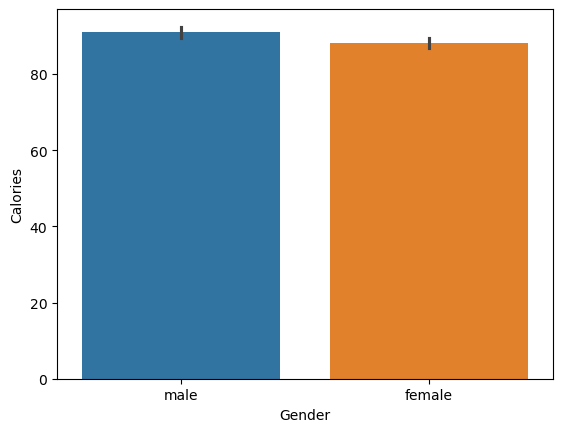

In [45]:
sns.barplot(x = data["Gender"] , y = data["Calories"] , hue = data["Gender"] )
plt.show()

C:\Users\ma516\AppData\Local\Temp\ipykernel_14016\2241150367.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['Age'] )


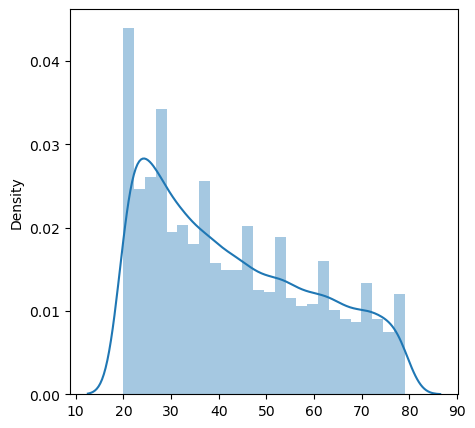

In [46]:
plt.figure(figsize=(5,5))
sns.distplot(x = data['Age'] )
plt.show()

# Encode our value

In [47]:
LE = LabelEncoder()

In [48]:
data["Gender"] = LE.fit_transform(data["Gender"])

In [49]:
x = data.drop(columns=["User_ID" , "Calories"])
y = data["Calories"]

In [50]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [51]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

# Trained our model

In [52]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,random_state=2,test_size=0.2)

In [53]:
model = XGBRegressor()

In [54]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
print(model.score(x_train , y_train))
print(model.score(x_test , y_test))

0.9995691477017405
0.998800624504713


C:\Users\ma516\AppData\Local\Temp\ipykernel_14016\1692008401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data["Calories"])


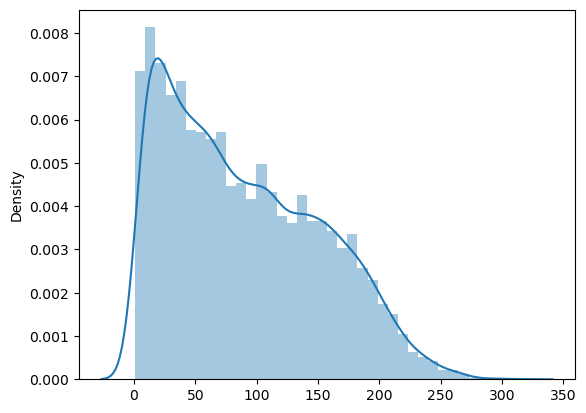

In [63]:
#  check our result data  and  prediction data by using plot
sns.distplot(x = data["Calories"])
plt.show()

C:\Users\ma516\AppData\Local\Temp\ipykernel_14016\198720397.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = trained_data)


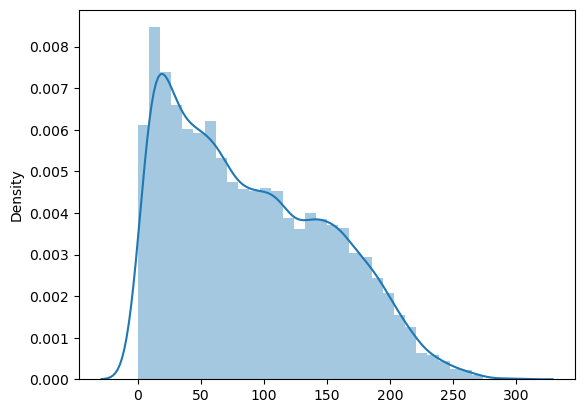

In [57]:
trained_data = model.predict(x_train)
sns.distplot(x = trained_data)
plt.show()

# predict our model

In [59]:
input_data = (1,	68,	190.0	,94.0	,29.0	,105.0,	40.8)
arrayed_data = np.asarray(input_data)
reshaped_data = arrayed_data.reshape(1,-1)
prediction = model.predict(reshaped_data)
print(prediction)

[236.13371]


# Make a sample to connect with streamlit

In [60]:
import pickle

In [61]:
pickle.dump(model , open("Calories Burnt . sav" , "wb"))
loaded_model = pickle.load(open("Calories Burnt . sav" , "rb"))

In [62]:
input_data = (1,	68,	190.0	,94.0	,29.0	,105.0,	40.8)
arrayed_data = np.asarray(input_data)
reshaped_data = arrayed_data.reshape(1,-1)
prediction = loaded_model.predict(reshaped_data)
print(prediction)

[236.13371]
